In [1]:
import matplotlib.pyplot as plt
from essentia.standard import *
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
import torch
import torch.nn as nn
import torch.optim as optim
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
import tensorflow as tf

tf.config.set_visible_devices([], "GPU")

# Stuff


In [3]:
tri = essentia.standard.MonoLoader(
    filename="/Users/javierechavarri/Library/Mobile Documents/com~apple~CloudDocs/TFG/new_samples/Tri_440Hz_Cut_1.wav"
)
tri1 = essentia.standard.MonoLoader(
    filename="/Users/javierechavarri/Library/Mobile Documents/com~apple~CloudDocs/TFG/new_samples/Tri+_440Hz_Cut_1.wav"
)
trisaw = essentia.standard.MonoLoader(
    filename="/Users/javierechavarri/Library/Mobile Documents/com~apple~CloudDocs/TFG/new_samples/TriSaw_440Hz_Cut_1.wav"
)
trisaw1 = essentia.standard.MonoLoader(
    filename="/Users/javierechavarri/Library/Mobile Documents/com~apple~CloudDocs/TFG/new_samples/TriSaw+_440Hz_Cut_1.wav"
)
saw = essentia.standard.MonoLoader(
    filename="/Users/javierechavarri/Library/Mobile Documents/com~apple~CloudDocs/TFG/new_samples/Saw_440Hz_Cut_1.wav"
)

data1 = tri().copy()
data2 = tri1().copy()
data3 = trisaw().copy()
data4 = trisaw1().copy()
data5 = saw().copy()

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import scipy.signal as signal
import matplotlib.pyplot as plt


def polynomial_regression(pot_values, data, degree):
    X = np.array(pot_values).reshape(-1, 1)
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, data)
    return model, polynomial_features


def median_filter(data, window_size):
    return signal.medfilt(data, kernel_size=window_size)


def split_data_ranges(pot_values, data, num_ranges):
    split_pot_values = np.array_split(pot_values, num_ranges)
    split_data = np.array_split(data, num_ranges)
    return split_pot_values, split_data


pot_values = [0, 0.25, 0.5, 0.75, 1]
data = [data1, data2, data3, data4, data5]

degree = 4
window_size = 5  # Adjust the window size for smoothing

# Split pot_values and data into smaller ranges
num_ranges = 1  # Adjust the number of ranges as desired
split_pot_values, split_data = split_data_ranges(pot_values, data, num_ranges)

# Perform polynomial regression and smoothing for each range
smoothed_predictions = []
for i in range(num_ranges):
    model, polynomial_features = polynomial_regression(
        split_pot_values[i], split_data[i], degree
    )
    new_pot_value = np.mean(split_pot_values[i])
    new_pot_value = np.clip(
        new_pot_value, min(split_pot_values[i]), max(split_pot_values[i])
    )  # Clip the new_pot_value to stay within the range
    new_pot_value_poly = polynomial_features.transform([[new_pot_value]])
    predicted_data = model.predict(new_pot_value_poly)
    smoothed_data = median_filter(predicted_data[0], window_size)
    smoothed_predictions.append(smoothed_data)

# Concatenate the smoothed predictions from each range
smoothed_predicted_data = np.concatenate(smoothed_predictions)

# Calculate the displacement
displacement = len(data[0]) - len(smoothed_predicted_data)

# Plot the smoothed predicted data and the original data
plt.plot(smoothed_predicted_data, label="Smoothed Predicted")
plt.plot(data3[displacement:], label="0.5")
plt.plot(data2[displacement:], label="0.25")
plt.plot(data1[displacement:], label="0")
plt.legend()
plt.show()

In [ ]:
# import numpy as np
# from sklearn.linear_model import Ridge

# def ridge_regression(x, y, alpha):
#     # Construct the design matrix with a column of ones
#     X = np.column_stack((np.ones(len(x)), x))

#     # Fit the Ridge regression model
#     model = Ridge(alpha=alpha)
#     model.fit(X, y)

#     return model.coef_

# # Example usage
# x = np.array([0, 0.25, 0.5, 0.75, 1])
# y = np.array([data1, data2, data3, data4, data5])  # Replace with your actual data

# alpha = 0.1  # Regularization parameter, adjust as needed

# # Perform Ridge regression
# coefficients = ridge_regression(x, y, alpha)

# # Predict for a new x value
# new_x = 0.25
# predicted_y = coefficients[0] + coefficients[1] * new_x

# print(f"Predicted y for x = {new_x}: {predicted_y}")


# print(predicted_data)
# plt.plot(predicted_data, label = 'predicted')
# plt.plot(data3, label = '0.5')
# plt.plot(data2, label = '0.25')
# plt.plot(data1, label = '0')
# plt.legend()
# plt.show()

In [ ]:
def linear_regression(x: np.ndarray, y: np.ndarray, degree: int, draw: bool):
    print(f"x: {x}")
    print(f"y: {y}")

    if len(x) != len(y):
        print("x and y have to have the same length!")
        return 0

    if degree > 0:
        X = np.ones(len(x))
        for i in range(1, degree + 1):  # corrected the range
            x_over = pow(x, i)
            X = np.vstack((X, x_over))
        # transpose X
        X = X.T
        theta = ((np.linalg.pinv(X.T.dot(X))).dot(X.T)).dot(y)

    if draw:
        # Display y
        _, ax = plt.subplots()
        ax.plot(y, "ro", label="y")
        ax.plot(X.dot(theta), "bs", label="Ax")
        plt.axis([-1, x.size + 1, -0.5, 1.5])
        plt.title(f"y vs X*theta with degree= {str(degree)}")
        plt.ylabel("samples")
        plt.xlabel("y[n]")
        ax.legend(loc="upper right", shadow=True)
        plt.grid()
        plt.show()

    error = sum(pow(abs(X.dot(theta) - y), 2))
    return theta, error

In [ ]:
sample = data1
data = np.array([data2, data3, data4, data5])
pot_values = np.array([0.25, 0.5, 0.75, 1])

In [ ]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]


# Interpolate between the two nearest models
def interpolate_models(model1, model2, pot_value1, pot_value2, new_pot_value):
    theta1, error1 = model1
    theta2, error2 = model2
    ratio = (new_pot_value - pot_value1) / (pot_value2 - pot_value1)
    new_theta = theta1 * (1 - ratio) + theta2 * ratio
    return new_theta


# Fit a model for each data pair and each pot_value
degree = 2  # The specific degree you want to use
models = []
for i in range(len(data)):
    theta, error = linear_regression(sample, data[i], degree, draw=False)
    models.append((theta, error))

# Now you have a model for each dataset pair and each pot_value

# Define new pot_value
new_pot_value = 0.5

# Find two nearest pot_values in the list
pot_values_sorted = sorted([(abs(pv - new_pot_value), pv) for pv in pot_values])
nearest_pot_value1, nearest_pot_value2 = [pv for _, pv in pot_values_sorted[:2]]

# Find corresponding models
nearest_index1 = list(pot_values).index(nearest_pot_value1)
nearest_index2 = list(pot_values).index(nearest_pot_value2)
nearest_model1 = models[nearest_index1]
nearest_model2 = models[nearest_index2]

# In the code that uses interpolate_models
new_model = interpolate_models(
    nearest_model1,
    nearest_model2,
    nearest_pot_value1,
    nearest_pot_value2,
    new_pot_value,
)

y_predicted = np.zeros_like(sample)
for i in range(len(new_model)):
    y_predicted += new_model[i] * sample**i


plt.plot(y_predicted)
plt.plot(data[0])
plt.plot(data[1])
plt.show()

# NN


## pytorch


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(51, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 50)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
net = Net()
optimi = optim.SGD(net.parameters(), lr=0.01)
crit = nn.MSELoss()
sample_tensor = torch.tensor(sample, dtype=torch.float32)

In [ ]:
for epoch in range(1000):
    for i in range(len(data)):
        x = torch.cat(
            (sample_tensor, torch.tensor([pot_values[i]], dtype=torch.float32))
        )
        y = torch.tensor(data[i], dtype=torch.float32)
        y_pred = net(x)
        loss = crit(y_pred, y)
        optimi.zero_grad()
        loss.backward()
        optimi.step()

In [ ]:
new_pot_value = 0.5
x_new = torch.cat((sample_tensor, torch.tensor([new_pot_value], dtype=torch.float32)))
y_new = net(x_new)

y_new_np = y_new.detach().numpy()
plt.plot(y_new_np, label="Predicted")
plt.plot(sample, label="0")
plt.plot(data[0], label="0.25")
plt.plot(data[1], label="0.5")
plt.legend()
plt.show()

## TensorFlow


In [41]:
sample = data1
data = np.array([data2, data3, data4, data5])
pot_values = np.array([0.25, 0.5, 0.75, 1])

In [94]:
from tensorflow.keras.layers import LSTM

# Model configuration
epochs = 200
batch_size = 100
dropout_rate = 0.2

# Reshape the data to 3D for LSTM
x_train = np.expand_dims(x_train, axis=1)

# Define LSTM based model
inputs = Input(shape=(1, original_dim))
pot_values_input = Input(shape=(1,))
x = LSTM(intermediate_dim, return_sequences=False)(inputs)
x = Concatenate()([x, pot_values_input])
x = Dropout(dropout_rate)(x)
outputs = Dense(original_dim, activation="linear")(x)

# Compile and train model
model = Model([inputs, pot_values_input], outputs)
model.compile(optimizer=Adam(lr=0.001), loss="mean_squared_error")
model.fit([x_train, pot_values_train], x_train, epochs=epochs, batch_size=batch_size)

Epoch 1/200
1/1 [==============================] - 1s 821ms/step - loss: 0.0580
Epoch 2/200
1/1 [==============================] - 0s 3ms/step - loss: 0.0626
Epoch 3/200
1/1 [==============================] - 0s 3ms/step - loss: 0.0551
Epoch 4/200
1/1 [==============================] - 0s 3ms/step - loss: 0.0433
Epoch 5/200
1/1 [==============================] - 0s 3ms/step - loss: 0.0513
Epoch 6/200
1/1 [==============================] - 0s 4ms/step - loss: 0.0534
Epoch 7/200
1/1 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 8/200
1/1 [==============================] - 0s 3ms/step - loss: 0.0429
Epoch 9/200
1/1 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 10/200
1/1 [==============================] - 0s 5ms/step - loss: 0.0384
Epoch 11/200
1/1 [==============================] - 0s 3ms/step - loss: 0.0447
Epoch 12/200
1/1 [==============================] - 0s 3ms/step - loss: 0.0416
Epoch 13/200
1/1 [==============================] - 0s 4ms/

InvalidArgumentError: Graph execution error:

Detected at node 'gradient_tape/mean_squared_error/mul_1' defined at (most recent call last):
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/q5/0h367kls0c90nflfjgwkyczc0000gn/T/ipykernel_66570/474203710.py", line 22, in <module>
      model.fit([x_train, pot_values_train], x_train, epochs=epochs, batch_size=batch_size)
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/site-packages/keras/engine/training.py", line 1054, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/site-packages/keras/optimizers/legacy/optimizer_v2.py", line 585, in minimize
      grads_and_vars = self._compute_gradients(
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/site-packages/keras/optimizers/legacy/optimizer_v2.py", line 643, in _compute_gradients
      grads_and_vars = self._get_gradients(
    File "/Users/javierechavarri/miniconda3/envs/TFG/lib/python3.9/site-packages/keras/optimizers/legacy/optimizer_v2.py", line 519, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/mean_squared_error/mul_1'
Incompatible shapes: [0] vs. [4,4,50]
	 [[{{node gradient_tape/mean_squared_error/mul_1}}]] [Op:__inference_train_function_123199]

1/1 [==============================] - 0s 15ms/step


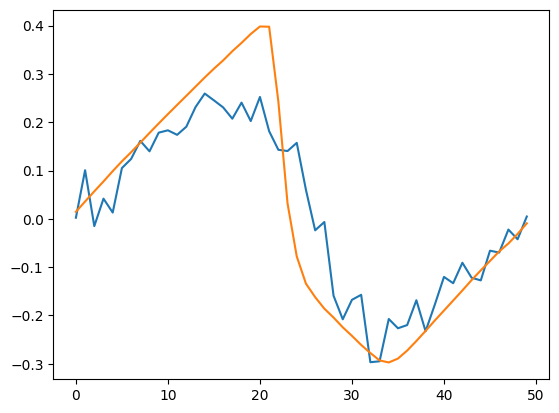

In [93]:
# Now you can use this trained model to predict for a new sample
new_sample = sample  # use your actual new sample here
new_pot_value = 0.5  # use your actual new pot value here
y_pred = vae.predict(
    [new_sample.reshape(1, -1), np.array([new_pot_value]).reshape(-1, 1)]
)

# y_pred would be the audio signal for a new sample
plt.plot(y_pred[0])
plt.plot(data[1])